<a href="https://colab.research.google.com/github/Ayeshashaik759/BASIC.ML/blob/main/labcrossval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv("Advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
x= data.drop('Sales',axis=1).values
y= data['Sales'].values

In [ ]:
x_tv = x[:,0]

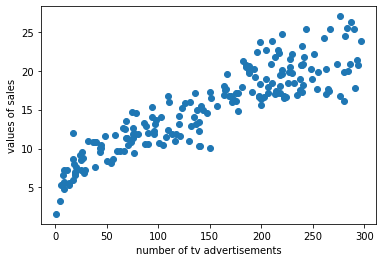

In [ ]:
plt.scatter(x_tv,y)
plt.xlabel('number of tv advertisements')
plt.ylabel('values of sales')
plt.show()

In [ ]:
x_tv = x_tv.reshape(-1,1)
y=y.reshape(-1,1)

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x_tv,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,x_test.shape

((160, 1), (40, 1))

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np
y_pred1=reg.predict(x_train)
print('MAE:',mean_absolute_error(y_train,y_pred1))
print('MSE:',mean_squared_error(y_train,y_pred1))
print('RMSE:',np.sqrt(mean_squared_error(y_train,y_pred1)))
print('R_2:',r2_score(y_train,y_pred1))

MAE: 1.8005092256620792
MSE: 4.998442356450173
RMSE: 2.235719650683013
R_2: 0.8134866044709264


In [ ]:
y_pred2=reg.predict(x_test)
print('MAE:',mean_absolute_error(y_test,y_pred2))
print('MSE:',mean_squared_error(y_test,y_pred2))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred2)))
print('R_2:',r2_score(y_test,y_pred2))

MAE: 1.9502948931650088
MSE: 6.101072906773963
RMSE: 2.470035001123256
R_2: 0.802561303423698


In [ ]:
lm = LinearRegression()

In [ ]:
folds = KFold(n_splits=5,shuffle=True,random_state=100)
scores = cross_val_score(lm,x_train,y_train,scoring='neg_mean_squared_error',cv=folds)
sqrt(mean(absolute(scores)))

2.2565669707801552